In [ ]:
pip install fasttext

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/BE PROJECT/Data sets/cleaned_dataset.csv')
df.head()

,Unnamed: 0,Case Name,Judgement,label
0,0,GilbertJohnMendoncaVStateOfMaharashtra,pc application bail file accuse try offence pu...,1
1,1,GopalBhujangraoKadamVStateOfMaharashtraThrSecr...,per sunil b shukre j 1 rule rule make returnab...,1
2,2,GopalGoyalVStateOfNctOfDelhi,pk bhasin j 1 application section 438 code cri...,1
3,3,GraceRaiRoseVIntelligenceOfficerNarcoticsContr...,prayer criminal petition file section 439 crpc...,1
4,4,GovindPrasadLathVStateOfWestBengal,ng talukdar j 1 application bail file behalf o...,1


In [ ]:
from io import StringIO
col = ['label', 'Judgement']
cases = df[col]
cases.head()

,label,Judgement
0,1,pc application bail file accuse try offence pu...
1,1,per sunil b shukre j 1 rule rule make returnab...
2,1,pk bhasin j 1 application section 438 code cri...
3,1,prayer criminal petition file section 439 crpc...
4,1,ng talukdar j 1 application bail file behalf o...


In [ ]:
cases['label']= ['__label__'+ str(s) for s in cases['label']]
print(cases)

           label                                          Judgement
0     __label__1  pc application bail file accuse try offence pu...
1     __label__1  per sunil b shukre j 1 rule rule make returnab...
2     __label__1  pk bhasin j 1 application section 438 code cri...
3     __label__1  prayer criminal petition file section 439 crpc...
4     __label__1  ng talukdar j 1 application bail file behalf o...
...          ...                                                ...
2021  __label__0  v savant j 1 learn length applicant respondent...
2022  __label__0  av savant j petition advocate seek cancellatio...
2023  __label__0  1 application file applicant prayer applicant ...
2024  __label__0  jagoish sahai j 1 petitioner come article 226 ...
2025  __label__0  1 applicant prefer present bail application se...

[2026 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Judgement'], df['label'], test_size=0.2, random_state=42)

In [ ]:
y_train= ['__label__'+ str(s) for s in y_train]
y_test= ['__label__'+ str(s) for s in y_test]

In [ ]:
d= {'label': y_train, 'Judgement': X_train}
train_cases = pd.DataFrame(d)


In [ ]:
d= {'Judgement': X_test}
test_cases = pd.DataFrame(d)
test_cases.head()

,Judgement
1284,1 vide petition assail order date pass learn a...
982,petition wife aggrieve order whereby judge app...
1542,av savant j application make judge expunge cer...
593,oral judgment 1 present applicant question cor...
1292,oral judgment 1 make returnable forthwith hear...


In [ ]:
import csv
train_cases.to_csv('/content/train_cases.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [ ]:
import csv
test_cases.to_csv('/content/test_cases.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [ ]:
% cd /content

/content


In [ ]:
import fasttext
model = fasttext.train_supervised(input="train_cases.txt",lr=1.0,wordNgrams=3 ,epoch=25)

In [ ]:
print(len(model.words))

45669


In [ ]:
predicted=model.predict(X_test.values.tolist())

In [ ]:
print(type(predicted))

<class 'tuple'>


In [ ]:
print(len(predicted[0]))
print(len(y_test))

406
406


In [ ]:
print(predicted[0])

[['__label__1'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__0'], ['__label__1'], ['__label__1'], ['__label__0'], ['__lab

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted[0],y_test)

0.812807881773399

In [ ]:
print(predicted[1])

[array([0.9959571], dtype=float32), array([0.974181], dtype=float32), array([0.9652714], dtype=float32), array([0.98156565], dtype=float32), array([0.984128], dtype=float32), array([0.98487055], dtype=float32), array([0.9644106], dtype=float32), array([0.97835255], dtype=float32), array([0.53380185], dtype=float32), array([0.7992377], dtype=float32), array([0.9998518], dtype=float32), array([0.5447677], dtype=float32), array([0.9319172], dtype=float32), array([0.6636595], dtype=float32), array([0.8075368], dtype=float32), array([0.9921419], dtype=float32), array([0.96627176], dtype=float32), array([0.98236394], dtype=float32), array([0.6571012], dtype=float32), array([0.9600954], dtype=float32), array([0.9995877], dtype=float32), array([0.9965259], dtype=float32), array([0.9994372], dtype=float32), array([0.999134], dtype=float32), array([0.9666035], dtype=float32), array([0.9917968], dtype=float32), array([0.9982347], dtype=float32), array([0.98399293], dtype=float32), array([0.949026

In [ ]:
pip install scikit-plot

Accuracy Score:  0.812807881773399
Precision Score:  0.8114874815905744
Recall Score:  0.812807881773399


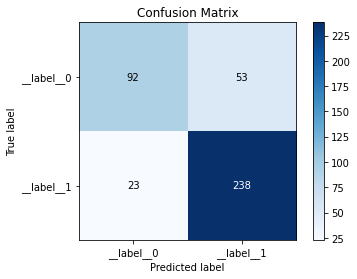

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test,predicted[0]))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
confusion_matrix(y_test, predicted[0])
print("Precision Score: ", precision_score(y_test,predicted[0], average='weighted'))
print("Recall Score: ", recall_score(y_test,predicted[0], average='weighted'))
plot_confusion_matrix(y_test, predicted[0])